<a href="https://colab.research.google.com/github/brianbaert/CapitaSelecta_IntruDTree/blob/main/CapitaSelecta_Project_nieuweDataset_WebAttacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capita Selecta project - IntruDTree
Team members: Daan Wesselman, Brian Baert


### Necessary imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import random
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
random.seed(datetime.now().timestamp())

## Using same methods on different dataset
Sharafaldin, I., Lashkari, A. H., Ghorbani, A. A. (2018). Towards generating a new intrusion detection dataset and intrusion traffic characterization. Proceedings of the 4th international conference on information systems security and privacy, 108-116
[DOI](https://www.scitepress.org/papers/2018/66398/66398.pdf)



### Exploring the dataset
The dataset can be found via this [link](https://www.unb.ca/cic/datasets/ids-2017.html).

The dataset contains of 8 sub-datasets with different attack-types as label. All of them are much larger than the dataset used in the original paper of Sarker et al. This notebook analyses the web-attacks subset: 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
#from google.colab import files
#uploaded=files.upload()
#train = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170366 non-null  int64  
 1    Flow Duration                170366 non-null  int64  
 2    Total Fwd Packets            170366 non-null  int64  
 3    Total Backward Packets       170366 non-null  int64  
 4   Total Length of Fwd Packets   170366 non-null  int64  
 5    Total Length of Bwd Packets  170366 non-null  int64  
 6    Fwd Packet Length Max        170366 non-null  int64  
 7    Fwd Packet Length Min        170366 non-null  int64  
 8    Fwd Packet Length Mean       170366 non-null  float64
 9    Fwd Packet Length Std        170366 non-null  float64
 10  Bwd Packet Length Max         170366 non-null  int64  
 11   Bwd Packet Length Min        170366 non-null  int64  
 12   Bwd Packet Length Mean       170366 non-nul

In [5]:
train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [45]:
train[[' Label']].value_counts()

 Label                    
BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
dtype: int64

In [6]:
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,170366.000000,1.703660e+05,170366.000000,170366.000000,1.703660e+05,1.703660e+05,170366.000000,170366.000000,170366.000000,170366.000000,...,170366.000000,170366.000000,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05
mean,7897.090599,1.246354e+07,15.124620,18.022276,5.569859e+02,3.183147e+04,167.775982,22.697786,48.233250,47.235628,...,11.925108,25.584506,7.433804e+04,4.676038e+04,1.646422e+05,5.012699e+04,3.690478e+06,1.310724e+05,3.784764e+06,3.543232e+06
std,18235.489428,3.193852e+07,1123.107756,1494.492871,7.710431e+03,3.460816e+06,461.299214,37.990783,94.947821,141.927429,...,1077.898793,6.354041,6.182048e+05,3.689605e+05,9.958673e+05,5.606797e+05,1.298830e+07,1.733767e+06,1.325135e+07,1.284183e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.920000e+02,1.000000,1.000000,3.100000e+01,6.000000e+00,23.000000,0.000000,7.882314,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.141200e+04,2.000000,2.000000,6.800000e+01,1.340000e+02,41.000000,6.000000,38.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.169818e+05,4.000000,2.000000,1.480000e+02,3.280000e+02,60.000000,41.000000,50.000000,17.897858,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65529.000000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,5463.493850,...,192491.000000,60.000000,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


## Removing some rows
The variables 'Flow Bytes/s' and ' Flow Packets/s' have rows with missing values. These instances are removed

In [7]:
train = train[train['Flow Bytes/s'] != np.inf].reset_index(drop=True)
train = train[train[' Flow Packets/s'] != np.inf].reset_index(drop=True)
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,170231.000000,1.702310e+05,170231.000000,170231.000000,1.702310e+05,1.702310e+05,170231.000000,170231.000000,170231.000000,170231.000000,...,170231.000000,170231.000000,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05,1.702310e+05
mean,7882.174815,1.247342e+07,15.135445,18.036151,5.574183e+02,3.185671e+04,167.901739,22.711615,48.265767,47.270878,...,11.934313,25.586397,7.439699e+04,4.679746e+04,1.647727e+05,5.016674e+04,3.693405e+06,1.311764e+05,3.787766e+06,3.546042e+06
std,18221.084577,3.194926e+07,1123.552939,1495.085273,7.713472e+03,3.462188e+06,461.460377,38.002272,94.978230,141.978047,...,1078.326070,6.354315,6.184464e+05,3.691045e+05,9.962513e+05,5.609002e+05,1.299303e+07,1.734451e+06,1.325617e+07,1.284654e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.920000e+02,1.000000,1.000000,3.100000e+01,6.000000e+00,23.000000,0.000000,8.800000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.143000e+04,2.000000,2.000000,6.800000e+01,1.340000e+02,41.000000,6.000000,38.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.318810e+05,4.000000,2.000000,1.480000e+02,3.280000e+02,60.000000,41.000000,50.000000,17.897858,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65529.000000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,5463.493850,...,192491.000000,60.000000,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


<Axes: title={'center': 'Distribution of Flow Bytes/s'}>

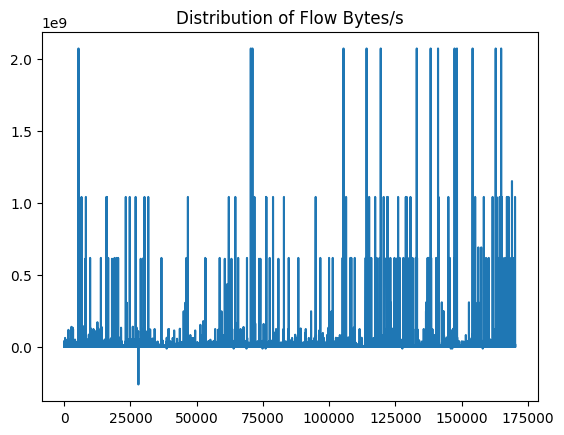

In [8]:
train['Flow Bytes/s'].plot(title='Distribution of Flow Bytes/s')

### Cleaning up the dataset


1.   Feature encoding (not needed for this dataset, there are no categorical variables)
2.   Feature scaling



In [9]:
y = train[' Label']
train.drop(' Label', axis='columns', inplace=True)

In [10]:
len(y) - y.value_counts()['BENIGN']

2180

In [11]:
np.unique(y)

array(['BENIGN', 'Web Attack � Brute Force', 'Web Attack � Sql Injection',
       'Web Attack � XSS'], dtype=object)

In [12]:
X = train

In [13]:
scaler = StandardScaler()
for col in X.columns:
  temp = np.array(X[col]).reshape(-1,1)
  temp_scaled = scaler.fit_transform(temp)
  X[col] = temp_scaled.flatten()

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170231 entries, 0 to 170230
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170231 non-null  float64
 1    Flow Duration                170231 non-null  float64
 2    Total Fwd Packets            170231 non-null  float64
 3    Total Backward Packets       170231 non-null  float64
 4   Total Length of Fwd Packets   170231 non-null  float64
 5    Total Length of Bwd Packets  170231 non-null  float64
 6    Fwd Packet Length Max        170231 non-null  float64
 7    Fwd Packet Length Min        170231 non-null  float64
 8    Fwd Packet Length Mean       170231 non-null  float64
 9    Fwd Packet Length Std        170231 non-null  float64
 10  Bwd Packet Length Max         170231 non-null  float64
 11   Bwd Packet Length Min        170231 non-null  float64
 12   Bwd Packet Length Mean       170231 non-nul

Perform the Train-Test-Split on the entire dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(0,10000))

### Calculating feature importance and ranking

First attempt is a random Decision Tree Classifier

In [16]:
FeatImportanceTree = DecisionTreeClassifier(criterion='gini', random_state=random.randint(0,10000))
FeatImportanceTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2353)

In [17]:
importances = {}
importanceList = FeatImportanceTree.feature_importances_
for feat, value in enumerate(importanceList):
  importances[X_train.columns[feat]] = np.round(value, 5)
sort_importances = sorted(importances.items(), key=lambda k: k[1], reverse=True)
pprint.pprint(sort_importances)

[(' Init_Win_bytes_backward', 0.49839),
 (' Fwd IAT Min', 0.19143),
 (' Flow IAT Min', 0.04473),
 (' Bwd Packets/s', 0.04246),
 (' Destination Port', 0.02379),
 (' Avg Fwd Segment Size', 0.02252),
 (' Flow IAT Std', 0.02124),
 (' Average Packet Size', 0.01915),
 (' Fwd IAT Max', 0.01673),
 (' Subflow Fwd Bytes', 0.01488),
 (' Flow IAT Max', 0.01278),
 ('Fwd IAT Total', 0.01188),
 (' Fwd IAT Std', 0.01097),
 (' Flow IAT Mean', 0.01059),
 ('Init_Win_bytes_forward', 0.00948),
 (' Fwd IAT Mean', 0.00908),
 (' Flow Duration', 0.00829),
 (' Fwd Packet Length Std', 0.00722),
 (' URG Flag Count', 0.00538),
 (' act_data_pkt_fwd', 0.00457),
 (' Fwd Packet Length Mean', 0.00216),
 (' Total Fwd Packets', 0.00172),
 (' Bwd IAT Min', 0.00102),
 (' Bwd IAT Mean', 0.00099),
 ('Subflow Fwd Packets', 0.00087),
 (' Subflow Bwd Bytes', 0.00085),
 (' Fwd Header Length.1', 0.00084),
 (' Flow Packets/s', 0.00078),
 (' Subflow Bwd Packets', 0.00068),
 (' Bwd Packet Length Std', 0.00061),
 (' Max Packet Length

second attempt is a Random Forest classifier (multiple decision trees in an ensemble)

In [18]:
FeatImportanceForest = RandomForestClassifier(criterion='gini', random_state=random.randint(0,10000))
FeatImportanceForest.fit(X_train, y_train)

RandomForestClassifier(random_state=7691)

In [19]:
importanceList = {}
importanceList = FeatImportanceForest.feature_importances_
for feat, value in enumerate(importanceList):
  importances[X_train.columns[feat]] = np.round(value, 5)
sort_importances = sorted(importances.items(), key=lambda k: k[1], reverse=True)
pprint.pprint(sort_importances)

[(' Fwd IAT Min', 0.13255),
 (' Init_Win_bytes_backward', 0.07663),
 (' Flow IAT Min', 0.07105),
 (' Fwd IAT Std', 0.04984),
 (' Flow IAT Std', 0.03345),
 (' Flow Duration', 0.03155),
 (' Destination Port', 0.03133),
 (' Max Packet Length', 0.03114),
 (' Fwd IAT Max', 0.03066),
 (' Fwd IAT Mean', 0.03002),
 (' PSH Flag Count', 0.02951),
 ('Fwd Packets/s', 0.02886),
 (' Flow IAT Mean', 0.02814),
 ('Fwd IAT Total', 0.02704),
 ('Init_Win_bytes_forward', 0.02692),
 (' Flow IAT Max', 0.02525),
 (' Average Packet Size', 0.02309),
 (' Packet Length Mean', 0.02279),
 (' Fwd Header Length', 0.02097),
 (' Avg Fwd Segment Size', 0.01825),
 (' Fwd Packet Length Max', 0.01748),
 (' Flow Packets/s', 0.01451),
 ('Total Length of Fwd Packets', 0.01444),
 (' Fwd Header Length.1', 0.01403),
 (' Subflow Fwd Bytes', 0.01368),
 (' Bwd Header Length', 0.01238),
 (' Packet Length Variance', 0.01216),
 (' Fwd Packet Length Mean', 0.01074),
 (' ACK Flag Count', 0.01063),
 (' Packet Length Std', 0.01003),
 ('Su


In the paper the researchers chose all features with a value above $t=0.02$.

In [20]:
#select important features
imp_feature_list = []
for feat in enumerate(sort_importances):
  if feat[1][1] > 0.02:
    imp_feature_list.append(feat[1][0])
pprint.pprint(imp_feature_list)

[' Fwd IAT Min',
 ' Init_Win_bytes_backward',
 ' Flow IAT Min',
 ' Fwd IAT Std',
 ' Flow IAT Std',
 ' Flow Duration',
 ' Destination Port',
 ' Max Packet Length',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' PSH Flag Count',
 'Fwd Packets/s',
 ' Flow IAT Mean',
 'Fwd IAT Total',
 'Init_Win_bytes_forward',
 ' Flow IAT Max',
 ' Average Packet Size',
 ' Packet Length Mean',
 ' Fwd Header Length']


We see that the amount of importance features is slightly larger (19) than for the original dataset (14)

### Designing the decision tree

In [21]:
IDT_DS_x = X_train[imp_feature_list]
IDTTree = DecisionTreeClassifier(criterion='gini', random_state=random.randint(0,10000))

In [22]:
cross_val_score(IDTTree, IDT_DS_x, y_train, cv=10)

array([0.99552096, 0.99530068, 0.99456641, 0.99581467, 0.99493318,
       0.99515347, 0.9954472 , 0.99530034, 0.99478631, 0.99508004])

In [23]:
IDTForest = RandomForestClassifier(criterion='gini', random_state=random.randint(0,10000))
IDTForest.fit(IDT_DS_x, y_train)

RandomForestClassifier(random_state=3212)

### Experimental results

### IntruDTree

Comparable good results as for original dataset

In [24]:
y_pred = IDTForest.predict(X_test[imp_feature_list])
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred))
print("Precision of Random Forest:", precision_score(y_test, y_pred,average='weighted'))
print("Recall of Random Forest:", recall_score(y_test, y_pred,average='weighted'))
print("Fscore of Random Forest:", f1_score(y_test, y_pred,average='weighted'))

Accuracy of Random Forest: 0.9962111199224601
Precision of Random Forest: 0.9958405297110132
Recall of Random Forest: 0.9962111199224601
Fscore of Random Forest: 0.9958714421439833


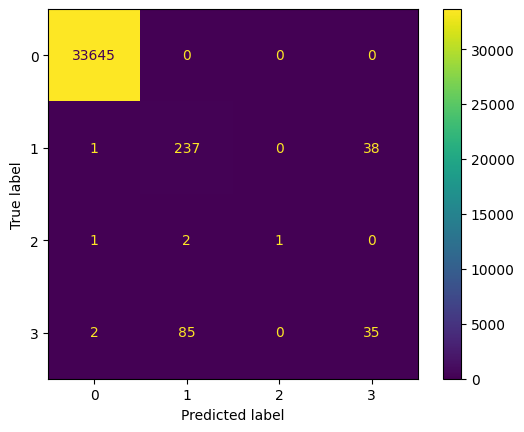

In [25]:
confMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confMatrix).plot()

In [26]:
y_pred

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [27]:
y_test = y_test.to_numpy()

In [28]:
#traffic = {'BENIGN': 0, 'DDoS': 1}
#y_test_int = np.vectorize(traffic.get)(y_test)
#y_pred_int = np.vectorize(traffic.get)(y_pred)

In [29]:
#y_test_int

In [30]:
#y_pred_int

In [31]:
#fpr, tpr, thresholds = roc_curve(y_test_int, y_pred_int, pos_label=1)
#roc_auc = auc(fpr,tpr)
#display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='IntruDTree model')
#isplay.plot()
#plt.show()

In [32]:
#print(roc_auc)

### Logistic Regression

##  
There are issues with the multicollinearity of features, I suggest we set up the correlation matrix and decide wich features to skip or use a different solver


In [33]:
corr = IDT_DS_x.corr()
corr.style.background_gradient(cmap='coolwarm')

,Fwd IAT Min,Init_Win_bytes_backward,Flow IAT Min,Fwd IAT Std,Flow IAT Std,Flow Duration,Destination Port,Max Packet Length,Fwd IAT Max,Fwd IAT Mean,PSH Flag Count,Fwd Packets/s,Flow IAT Mean,Fwd IAT Total,Init_Win_bytes_forward,Flow IAT Max,Average Packet Size,Packet Length Mean,Fwd Header Length
Fwd IAT Min,1.000000,-0.031862,0.275302,-0.030944,0.833939,0.254671,-0.054666,-0.048679,0.664064,0.969866,-0.071476,-0.028787,0.862381,0.256515,-0.007596,0.660989,-0.027232,-0.029677,-0.001630
Init_Win_bytes_backward,-0.031862,1.000000,-0.012623,0.070771,0.012980,0.009740,0.083883,0.029590,-0.000834,-0.008472,0.256660,-0.042203,0.005752,0.009247,0.207831,0.000090,-0.027527,-0.013734,-0.001201
Flow IAT Min,0.275302,-0.012623,1.000000,-0.014857,-0.011499,0.063519,-0.019192,-0.024256,0.178809,0.265289,-0.026722,-0.011419,0.624822,0.064114,0.163564,0.178235,-0.027800,-0.026898,-0.000656
Fwd IAT Std,-0.030944,0.070771,-0.014857,1.000000,0.457400,0.611360,-0.124586,0.312747,0.668419,0.186605,0.391405,-0.067703,0.233219,0.611190,0.236365,0.664079,0.183161,0.204583,0.001097
Flow IAT Std,0.833939,0.012980,-0.011499,0.457400,1.000000,0.537063,-0.112627,0.121576,0.886127,0.917497,0.151886,-0.060286,0.755320,0.535954,0.081661,0.886874,0.069557,0.078017,-0.000891
Flow Duration,0.254671,0.009740,0.063519,0.611360,0.537063,1.000000,-0.160368,0.521539,0.638460,0.421137,0.525735,-0.086272,0.424075,0.998467,0.288151,0.637677,0.330865,0.363266,0.031011
Destination Port,-0.054666,0.083883,-0.019192,-0.124586,-0.112627,-0.160368,1.000000,-0.181931,-0.126047,-0.086940,-0.220700,0.311148,-0.093224,-0.157524,-0.102231,-0.129156,-0.218124,-0.204907,-0.005448
Max Packet Length,-0.048679,0.029590,-0.024256,0.312747,0.121576,0.521539,-0.181931,1.000000,0.257533,0.023952,0.712318,-0.094881,0.033855,0.510806,0.400637,0.269705,0.832191,0.861470,0.075974
Fwd IAT Max,0.664064,-0.000834,0.178809,0.668419,0.886127,0.638460,-0.126047,0.257533,1.000000,0.775443,0.250247,-0.068400,0.730153,0.639968,0.183483,0.994759,0.188544,0.205183,0.003920
Fwd IAT Mean,0.969866,-0.008472,0.265289,0.186605,0.917497,0.421137,-0.086940,0.023952,0.775443,1.000000,0.037061,-0.046092,0.907369,0.422733,0.050753,0.771350,0.000296,0.003234,-0.001499


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = IDT_DS_x.columns
vif["vif_Factor"] = [variance_inflation_factor(IDT_DS_x.values, i) for i in range(IDT_DS_x.shape[1])]
vif = vif[vif.vif_Factor < 10]
vif

,features,vif_Factor
1,Init_Win_bytes_backward,1.197071
6,Destination Port,1.251579
7,Max Packet Length,6.645786
10,PSH Flag Count,3.324606
11,Fwd Packets/s,1.127145
14,Init_Win_bytes_forward,1.601771
18,Fwd Header Length,1.012077


In [48]:
from sklearn.linear_model import LogisticRegressionCV
import random
lrCV = LogisticRegressionCV(cv=10, random_state=random.randint(0,10000), multi_class='multinomial', max_iter=100, solver='lbfgs', verbose=True).fit(IDT_DS_x[vif.features], y_train)
#lrCV = LogisticRegressionCV(cv=10, random_state=random.randint(0,10000), max_iter=100, solver='newton-cholesky', verbose=True).fit(IDT_DS_x[vif.features], y_train)
# there are warnings
y_pred = lrCV.predict(X_test[vif.features])

print("Accuracy of LR:", accuracy_score(y_test, y_pred))
print("Precision of LR:", precision_score(y_test, y_pred,average='weighted'))
print("Recall of LR:", recall_score(y_test, y_pred,average='weighted'))
print("Fscore of LR:", f1_score(y_test, y_pred,average='weighted'))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of LR: 0.9881927923165037


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of LR: 0.9765249947862886
Recall of LR: 0.9881927923165037
Fscore of LR: 0.9823242479905681


The resulting accuracy (default returned score) is 0.97

### SVM

In [36]:
from sklearn.svm import SVC
svCV = SVC(random_state=random.randint(0,10000), gamma='auto')
svCV.fit(IDT_DS_x, y_train)
y_pred = svCV.predict(X_test[imp_feature_list])

print("Accuracy of SVM:", accuracy_score(y_test, y_pred))
print("Precision of SVM:", precision_score(y_test, y_pred,average='weighted'))
print("Recall of SVM:", recall_score(y_test, y_pred,average='weighted'))
print("Fscore of SVM", f1_score(y_test, y_pred,average='weighted'))

Accuracy of SVM: 0.9925397244984874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of SVM: 0.995022667702793
Recall of SVM: 0.9925397244984874
Fscore of SVM 0.9916988060936549


The resulting accuracy (defeault return score) is 0.99, larger than the 0.95-score for the original dataset

### NB
We use GaussianNB and will define the prior probabilities of each class by investigating the number of occurrences of each class in the training dataset

In [37]:
np.array(np.unique(y_train, return_counts=True)).T

array([['BENIGN', 134406],
       ['Web Attack � Brute Force', 1231],
       ['Web Attack � Sql Injection', 17],
       ['Web Attack � XSS', 530]], dtype=object)

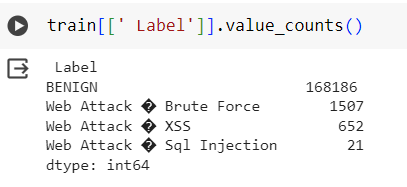

In [46]:
#the priors need to be adjusted to the output of the count function above
prior_normal = 168186/(170366)
prior_anomaly_brute_force = 1507/(170366)
prior_anomaly_XSS = 652/(170366)
prior_anomaly_sql_inj = 21/(170366)


In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(priors=[prior_normal, prior_anomaly_brute_force, prior_anomaly_XSS, prior_anomaly_sql_inj])
nb.fit(IDT_DS_x, y_train)
y_pred = nb.predict(X_test[imp_feature_list])

print("Accuracy of NB:", accuracy_score(y_test, y_pred))
print("Precision of NB:", precision_score(y_test, y_pred,average='weighted'))
print("Recall of NB:", recall_score(y_test, y_pred,average='weighted'))
print("Fscore of NB", f1_score(y_test, y_pred,average='weighted'))

Accuracy of NB: 0.9711868887126619
Precision of NB: 0.9896570567569208
Recall of NB: 0.9711868887126619
Fscore of NB 0.9785061752341085


The results of the Gaussian Naive Bayes approach is much larger than for the original dataset (0.98 versus 0.61)


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(IDT_DS_x,y_train)
y_pred = knc.predict(X_test[imp_feature_list])

print("Accuracy of KNN:", accuracy_score(y_test, y_pred))
print("Precision of KNN:", precision_score(y_test, y_pred,average='weighted'))
print("Recall of KNN:", recall_score(y_test, y_pred,average='weighted'))
print("Fscore of KNN", f1_score(y_test, y_pred,average='weighted'))

Results are again better than for original dataset (0.991 versus 0.999)